# Лабораториска вежба 2
## Машинска визија 2018/2019
### Андреј Јанчевски - 151003

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

### Читање и намалување на сликата, еквилизација на нејзиниот хистограм и прикажување на сликата

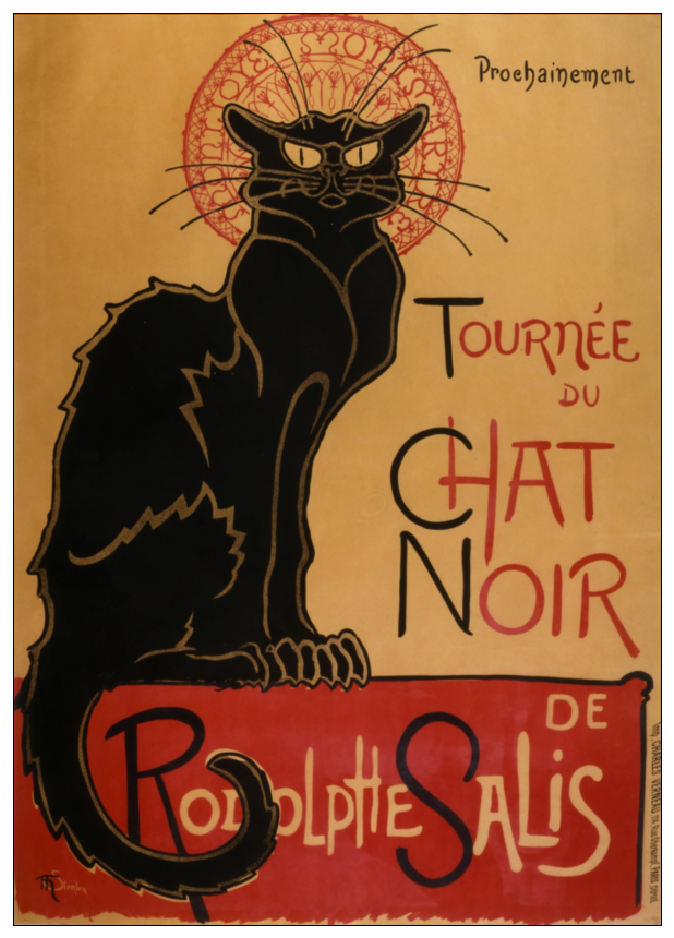

In [2]:
img = cv2.imread("chat_noir.jpg", cv2.IMREAD_COLOR)
img = cv2.pyrDown(img)
img = cv2.pyrDown(img)
width, height, channels = np.shape(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img[:][:][0] = cv2.equalizeHist(img[:][:][0])
img[:][:][1] = cv2.equalizeHist(img[:][:][1])
img[:][:][2] = cv2.equalizeHist(img[:][:][2])
plt.figure(1, figsize=(9, 16), dpi=width / 9)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

### Прикажување на пикселите од сликата во просторот на бои

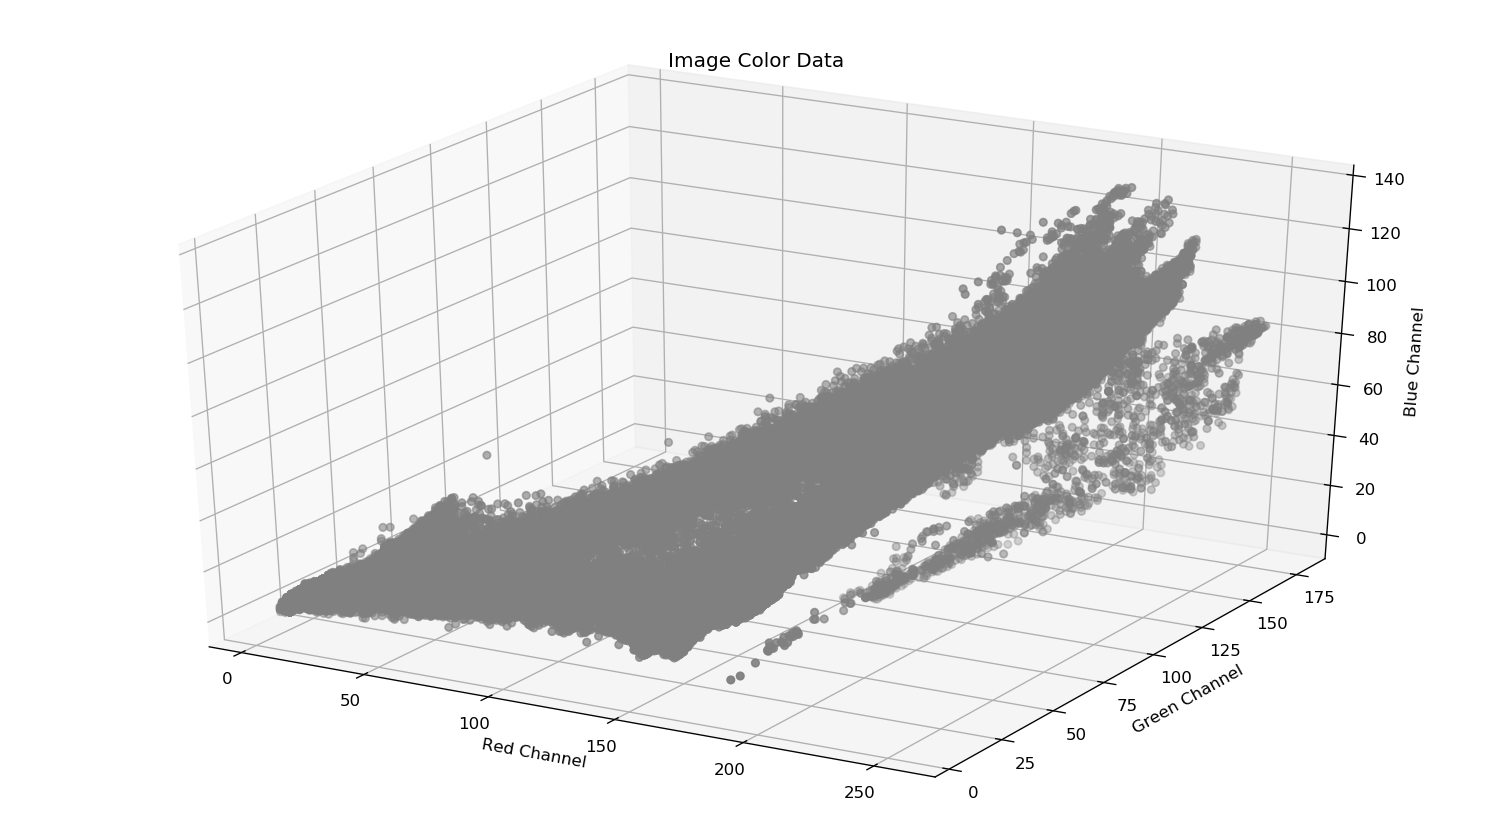

In [3]:
data = np.reshape(img, (width * height, channels))

fig = plt.figure(1, figsize=(16, 9), dpi=1920 / 16)
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Image Color Data")
ax.scatter(data[:, 0], data[:, 1], data[:, 2], color="gray", marker="o")
ax.set_xlabel("Red Channel")
ax.set_ylabel("Green Channel")
ax.set_zlabel("Blue Channel")
plt.show()

### Кластерирање на податоците

In [4]:
kmeans = KMeans(
    n_clusters=3, init='random', n_init=20, max_iter=1000, tol=1e-6,
    n_jobs=-1).fit(data)
num_iter = kmeans.n_iter_
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Iterations required: " + str(num_iter))
print("Centroids: \n" + str(centroids))
print("Within-Cluster Distance / Between-Cluster Distance: " +
      str(metrics.cluster.davies_bouldin_score(data, labels)))
if width * height < 10000:
    print("Silhouette Coefficient: " +
          str(metrics.cluster.silhouette_score(data, labels)))

Iterations required: 11
Centroids: 
[[198.85668424 142.53789109  76.55335149]
 [ 22.19425217  16.74342124  11.06947487]
 [153.86055899  47.928071    28.27861734]]
Within-Cluster Distance / Between-Cluster Distance: 0.3776774126236584


C:\Users\bani5\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


### Приказ на податоците во кластери

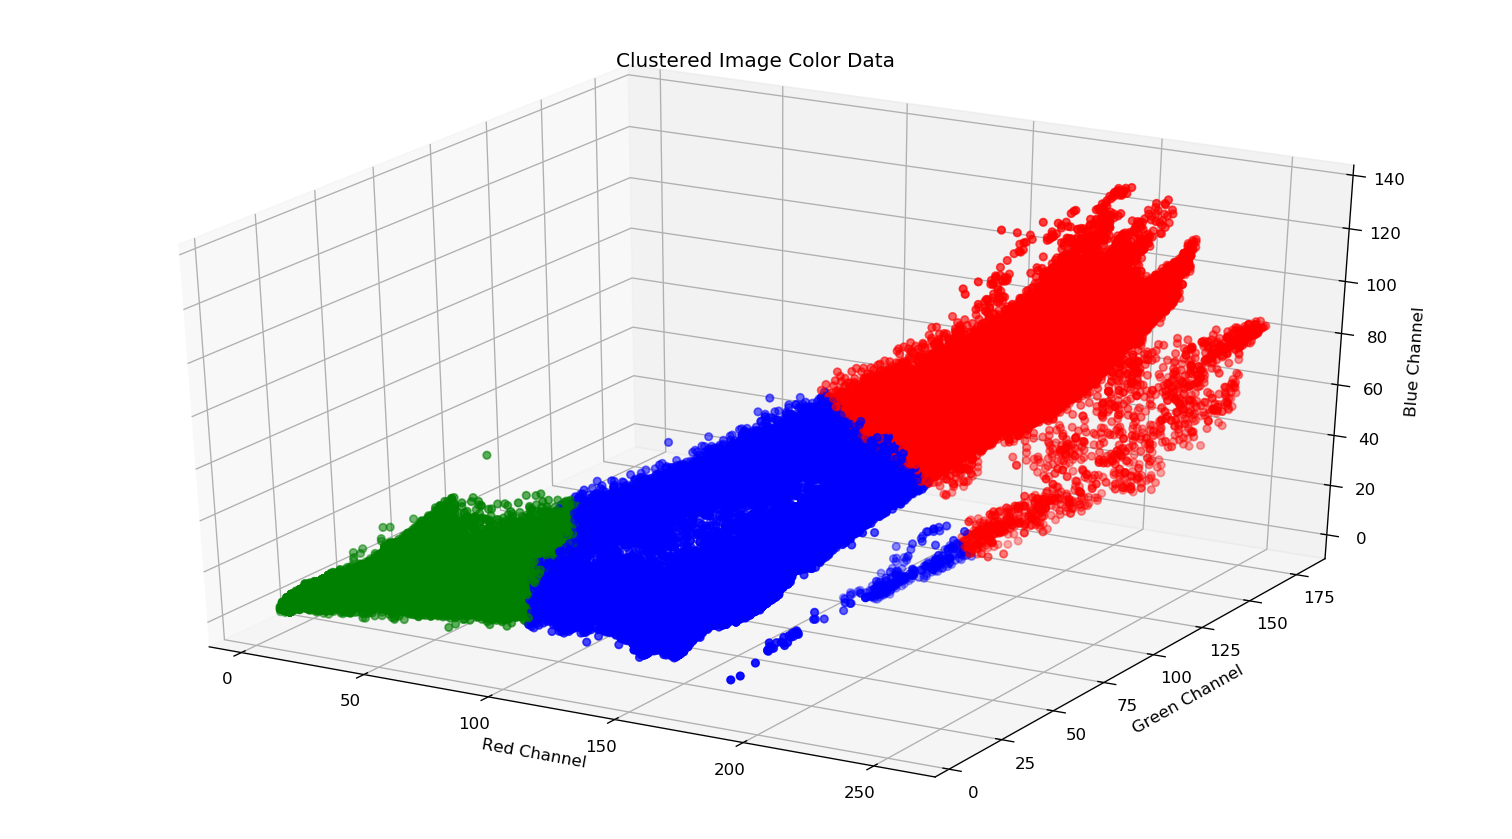

In [5]:
color_map = ["red", "green", "blue"]
colors = [color_map[label] for label in labels]

fig = plt.figure(1, figsize=(16, 9), dpi=1920 / 16)
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Clustered Image Color Data")
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, marker="o")
ax.set_xlabel("Red Channel")
ax.set_ylabel("Green Channel")
ax.set_zlabel("Blue Channel")
plt.show()

### Приказ на сегментираната слика

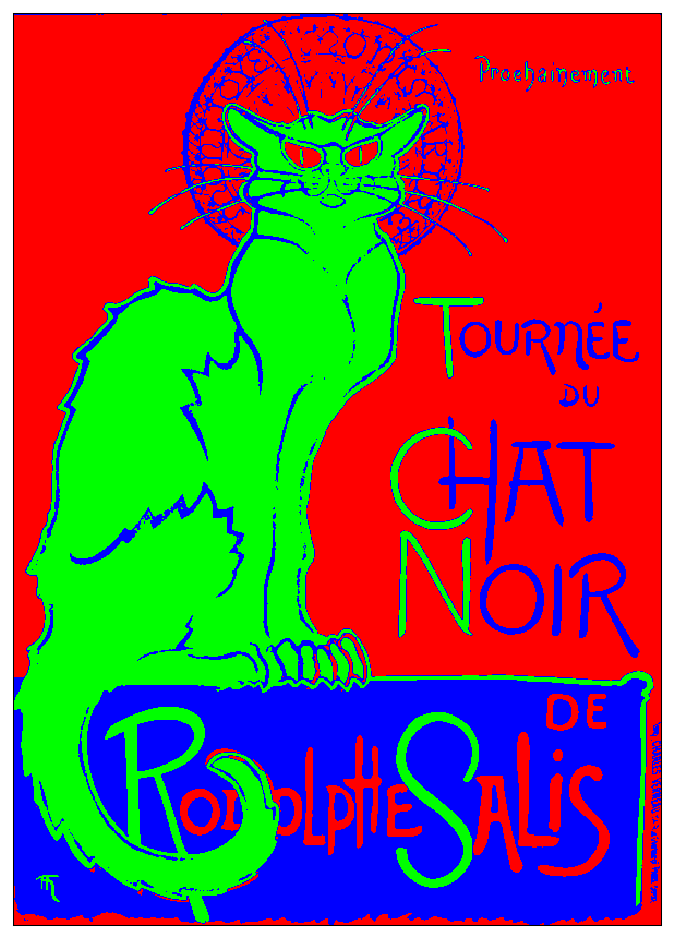

In [6]:
color_map = [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
segmented_data = [
    np.array(color_map[label], dtype=np.uint8) for label in labels
]
segmented_img = np.reshape(segmented_data, (width, height, channels))

plt.figure(1, figsize=(9, 16), dpi=width / 9)
plt.imshow(segmented_img)
plt.xticks([])
plt.yticks([])
plt.show()

### Приказ на сегментираната слика во бојата на центроидите

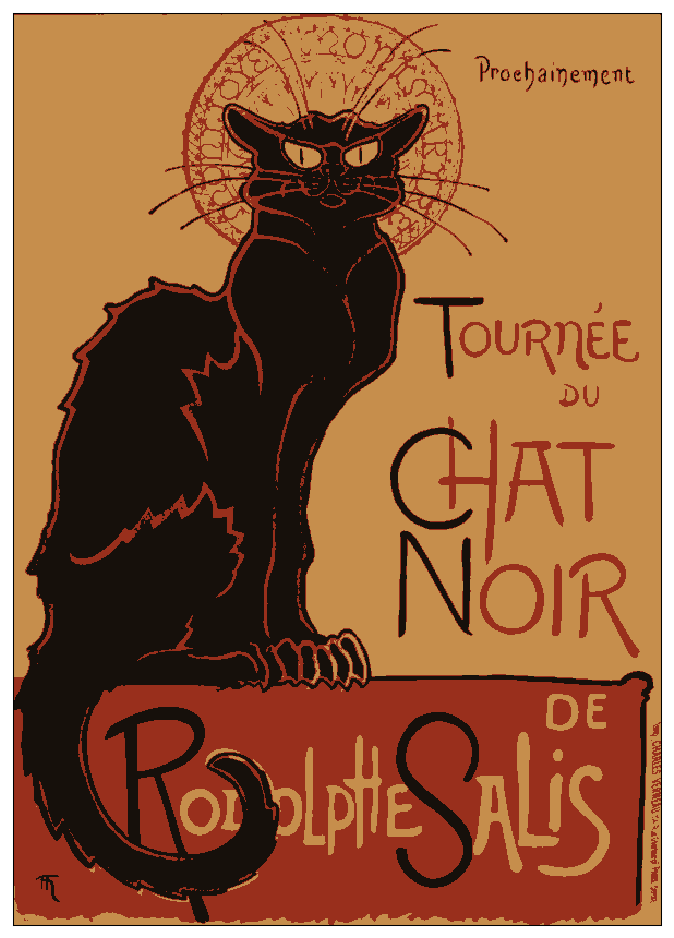

In [7]:
segmented_data = [
    np.array(centroids[label], dtype=np.uint8) for label in labels
]
segmented_img = np.reshape(segmented_data, (width, height, channels))

plt.figure(1, figsize=(9, 16), dpi=width / 9)
plt.imshow(segmented_img)
plt.xticks([])
plt.yticks([])
plt.show()